Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


<Figure size 432x288 with 0 Axes>

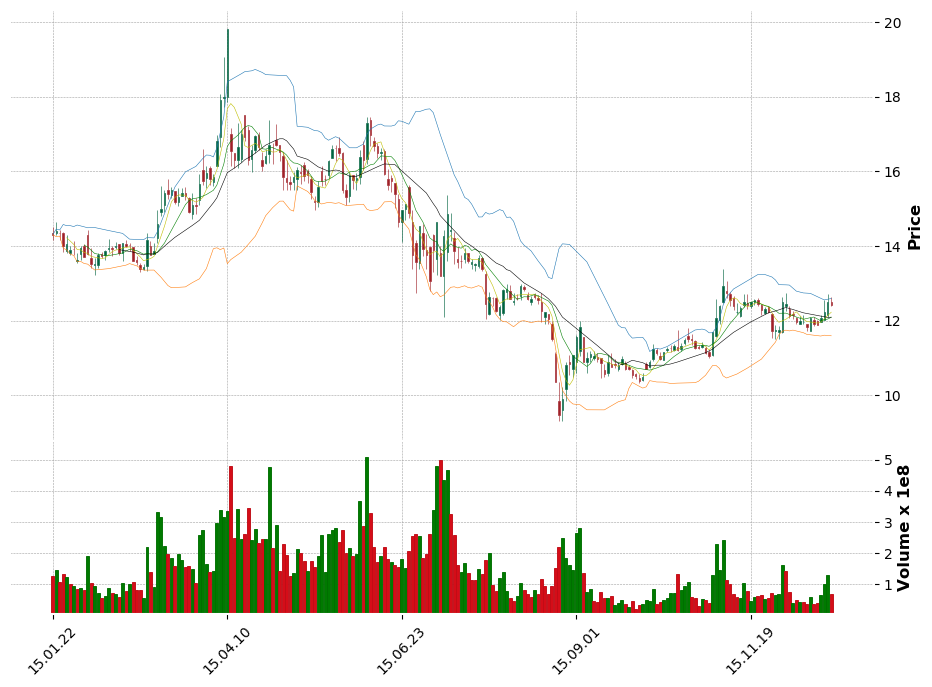

In [1]:
"""

readme
第一段是我们的万德取数据。这边可以在indexcode里面改变要选择的股票

addma是用来求ma的function
boll是用来算bollingerband参数的funcition
add_plot是用来给我们的kplot函数定义addplot这个参数的
set_index是用来把dataframe里的date variable 定义到index里面

k_plot是我们用来画图的。

要测试的话 去掉最后面的＃字号就可以了
"""
get_ipython().run_line_magic('matplotlib', 'inline')
#%matplotlib inline
import numpy as np
import pandas as pd
from WindPy import w
from matplotlib.pylab import date2num
import mplfinance as mpf
import matplotlib.pyplot as plt


class k:
    def addma(data,ma1=5,ma2=10,ma3=20,time_period=20):
        """
        function-calculate ma for dataframe
        
        input:
        data              a dataframe with close, which is our moving average target column
        ma1,ma2,ma3       the moving average length that we need to use for three mas.

        output:
        df                a dataframe with ma1,ma2,ma3 added
        """
        data['ma1']=data.close.rolling(ma1).mean()
        data['ma2']=data.close.rolling(ma2).mean()
        data['ma3']=data.close.rolling(ma3).mean()
        return data
    
    
    def boll(data,time_period=20):
        """
        function-calculate bollingerbands for dataframe
        
        input:
        data            a dataframe with close, which is our bollingbands target
        time_period     a parameter which used to decide the length of sma duration
        
        output:
        data           a dataframe with 'bolu','bold' included
        """
        time_period=20#默认sma的计算周期=20
        time_period = time_period  # SMA的计算周期，默认为20
        stdev_factor = 2  # 上下频带的标准偏差比例因子
        history = []  # 每个计算周期所需的价格数据
        sma_values = []  # 初始化SMA值
        upper_band = []  # 初始化阻力线价格
        lower_band = []  # 初始化支撑线价格
        for close_price in data['close']:
            history.append(close_price)
            # 计算移动平均时先确保时间周期不大于20
            if len(history) > time_period:
                del (history[0])
            # 将计算的SMA值存入列表
            sma = np.mean(history)
            sma_values.append(sma)  
            # 计算标准差
            stdev = np.sqrt(np.sum((history - sma) ** 2) / len(history))  
            upper_band.append(sma + stdev_factor * stdev)
            lower_band.append(sma - stdev_factor * stdev)
        # 将计算的数据合并到DataFrame
        data = data.assign(bolu=pd.Series(upper_band, index=data.index))
        data = data.assign(bold=pd.Series(lower_band, index=data.index))
        return data
    
    
    def add_plot(data,ma=True,boll=True):
        """
        function-define add_plot for our mlf funciotn
        input :
        data          a dataframe with ma1, ma2, ma3, bolu, bold
        ma            show ma line on the graph or not
        boll          show bollingerbands on the graph or not
        
        """
        if ma==True:
            if boll==True:
                add_plot = [mpf.make_addplot(data[['bolu', 'bold']],width=0.4),
                mpf.make_addplot(data[['ma1']],width=0.4,color='y'),
                mpf.make_addplot(data[['ma2']],width=0.4,color='g'),
                mpf.make_addplot(data[['ma3']],width=0.4,color='black')
                       ]
            else:
                add_plot = [mpf.make_addplot(data[['ma1']],width=0.4,color='y'),
                mpf.make_addplot(data[['ma2']],width=0.4,color='g'),
                mpf.make_addplot(data[['ma3']],width=0.4,color='black')]
        else:
            if boll==True:
                add_plot = [mpf.make_addplot(data[['bolu', 'bold']],width=0.4)
                       ]   
            else:
                add_plot=1
        return add_plot
    
    
    
    def set_index(data):
        """
        function-set the index as our datetime variable
        input:
        data        a dataframe with Date
        
        output:
        data        a dataframe with index in datetime added
        """
        data['Date2']=pd.to_datetime(data['Date'],format='%Y/%m/%d')
        data.set_index(['Date2'],inplace=True)
        return data
    
    
    
    def kplot(data,ma=True,boll=True,ma1=5,ma2=10,ma3=20,time_period=20):
        """
        function: draw the k-plot
        input:
        data                a dataframe with Date,open high low close volume
        ma                  weather u want ma line on the k-plot or not
        boll                weather u want bollinger bands on the k-plot or not
        ma1,ma2,ma3         the moving average length that we need to use for three mas.
        time_period          a parameter which used to decide the length of sma duration
        
        output:
        df                   our final dataframe, whith si the origional one with bolu bold and mas
        (you can output this df by getting rid of the # symbol at the end)
        draw k-plot
        """
        df=k.set_index(data)
        df=k.boll(data=df,time_period=time_period)
        df=k.addma(data=df,ma1=ma1,ma2=ma2,ma3=ma3)
        add_plot=k.add_plot(data=df,ma=ma,boll=boll)
        
        
        
        if add_plot==1:
            plt.figure()
            mpf.plot(df, type='candle', style='charles',datetime_format = '%y.%m.%d',volume=True,figscale=1.5)
            plt.show()
        else:
            plt.figure()
            mpf.plot(df, type='candle', style='charles',addplot=add_plot,datetime_format = '%y.%m.%d',volume=True,figscale=1.5)
            plt.show()
        #return df    






#从万德获得数据

w.start();
indexcode="000001.SZ"
df=w.wsd(indexcode, "open,high,low,close,volume", "2015-1-22", "2015-12-22", "")
df=pd.DataFrame(df.Data,index=df.Fields,columns=df.Times)
df=df.T #转置 
df['Date']=df.index
df.rename(columns={'OPEN': 'open','HIGH': 'high','LOW': 'low','CLOSE': 'close', 'VOLUME': 'volume'}, inplace=True) 

    
k.kplot(data=df)

